# Application of TSP

## Objective

The goal of this task is to design a **Traveling Salesman Problem (TSP)** based on a real-world locality. The idea is to represent a set of places (e.g., cities, landmarks, or locations) based on their geographical coordinates and use an optimization algorithm to determine the optimal route. After solving the TSP, we will also provide a graphical representation of the solution to visualize the optimal route.

## Steps:

1. **Defining the Problem**:
   - Identify a specific locality or region.
   - Choose a set of locations within the region that need to be visited (e.g., tourist destinations, delivery points, etc.).
   - Represent these locations using geographical coordinates (latitude and longitude).

2. **Loading Necessary Libraries**:
   To solve the TSP and visualize the solution, we will use the following libraries:
   - **NumPy**: For efficient numerical operations and array manipulations.
   - **Matplotlib**: For graphical representation and plotting of the cities and the optimal route.
   - **Random**: To generate initial random solutions (if needed).
   - **SciPy** or **Geopy**: For computing geographical distances (e.g., Euclidean distance or Haversine formula for real-world geographic coordinates).
   - **Algorithm libraries**: For implementing genetic algorithms, or other optimization techniques to solve the TSP.

Here's a snippet of the code that loads the necessary libraries:

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
from PIL import Image

### Importing the Distance Matrix

The distance matrix is a key component in solving the **Traveling Salesman Problem (TSP)**. It holds the distances between each pair of cities, which the algorithm will use to evaluate the quality of different routes. This matrix represents the **cost** of traveling between two cities, allowing the algorithm to assess how far one city is from another and optimize the travel path accordingly.

To import the distance matrix, we load it from a text file that contains the pairwise distances between cities. Typically, this matrix is stored as a square matrix where each entry `tsp[i][j]` represents the distance between city `i` and city `j`.

In [2]:
tsp=np.loadtxt("matriz_distancias.txt")

### Generating a Random Solution

The **Best Improving** algorithm starts by selecting an initial solution randomly. This solution serves as the starting point for the algorithm's iterative improvement process. The random solution is a permutation of all cities, and it forms the basis for the search for better solutions by progressively improving it through local search.

The function `randomSolution` generates a completely random permutation of cities, which is used as the initial solution in the **Best Improving** algorithm. The `seed` parameter ensures that the randomness can be controlled, which is important for reproducibility and debugging purposes.

In [3]:
def randomSolution(tsp, seed=None):
    """
    Generate a random initial solution for the TSP problem.

    Parameters:
    - tsp: The distance matrix representing the TSP problem.
    - seed: An optional integer to set the random seed for reproducibility.

    Returns:
    - A list representing a random permutation of city indices.
    """
    if seed is not None:
        random.seed(seed)
    solution = random.sample(range(len(tsp)), len(tsp))
    return solution

### Calculating the Total Distance of the Route

The **routeLength** function computes the total distance that the salesman would travel if the provided solution were the path taken to visit all the cities. This function is essential for evaluating the quality of different solutions in optimization algorithms like the **Best Improving** algorithm, as it calculates the total travel cost based on the distance matrix.

In [4]:
def routeLength(tsp, solution):
    """
    Calculate the total distance of the route represented by the solution.

    Parameters:
    - tsp: A 2D list or numpy array representing the distance matrix.
    - solution: A list representing the order of cities in the route.

    Returns:
    - The total distance of the route as a float or integer.
    """
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tsp[solution[i-1]][solution[i]]
    return routeLength

### 2-Opt Swap: A Key Operator for TSP

In the context of the **Traveling Salesman Problem (TSP)**, the **2-opt swap** is a widely used local search operator. It aims to improve the solution by reversing a section of the route, which can help eliminate crossings in the tour and thus reduce the total distance traveled. The idea behind the 2-opt swap is simple but effective: by iteratively applying this swap, the algorithm explores the neighborhood of the current solution, gradually moving toward better solutions.

In [5]:
def two_opt_swap(route, i, k):
    """
    Perform a 2-opt swap on the given route by reversing the
    order of the nodes between indices i and k (inclusive).

    Parameters:
    - route: The current solution represented as a list of city indices (the tour).
    - i: The starting index for the 2-opt swap.
    - k: The ending index for the 2-opt swap.

    Returns:
    - A new route with the segment between indices i and k reversed.
    """
    new_route = route.copy()  # Create a copy of the current route to avoid modifying the original
    new_route[i:k+1] = reversed(route[i:k+1])  # Reverse the segment between i and k
    return new_route

### Generating Neighbors for TSP: A 2-Opt Neighborhood Search

In the **Traveling Salesman Problem (TSP)**, a **neighborhood** refers to all possible solutions that are closely related to the current solution. A common technique for generating neighbors is to apply local search operators, such as the **2-opt swap**, to the current solution. The **get_neighbors** function creates all possible neighbors of a given route by applying the 2-opt swap to each pair of edges in the tour.

This function explores the local search space of the current solution by generating all potential routes that can be obtained through a 2-opt swap, allowing the algorithm to search for improvements by evaluating each neighbor.

In [6]:
def get_neighbors(route):
    """
    Generate all neighbors of the given TSP route by performing
    a 2-opt swap on each pair of edges.

    Parameters:
    - route: The current TSP solution represented as a list of city indices.

    Returns:
    - A list of all neighboring routes generated by applying the 2-opt swap
      on each pair of edges in the given route.
    """
    n = len(route)  # Get the length of the route
    neighbors = []  # Initialize the list of neighbors
    
    # Iterate over all pairs of cities (i, k) where i < k
    for i in range(n):
        for k in range(i + 1, n):
            # Apply the 2-opt swap between indices i and k
            new_route = two_opt_swap(route, i, k)
            neighbors.append(new_route)  # Add the new route to the neighbors list
    
    return neighbors

### Best Neighbor Selection in TSP: Steepest Ascent Hill Climbing

In optimization problems such as the **Traveling Salesman Problem (TSP)**, one common approach for local search is the **Steepest Ascent Hill Climbing** algorithm. This method explores the solution space by iteratively selecting the best neighboring solution, based on some evaluation criteria (in this case, the total distance of the route). At each step, the algorithm moves to the neighbor that provides the most improvement in the objective function, typically aiming to minimize the total route length.

In our case, we evaluate all neighboring routes and select the one with the shortest distance, effectively applying a gradient descent approach in the discrete search space of the TSP.

In [7]:
def getBestNeighbour(tsp, neighbours):
    """
    For each solution in the neighborhood, calculate the distance and keep the best one.
    This is essentially a steepest ascent hill climbing approach.

    Parameters:
    - tsp: The distance matrix representing the distances between cities.
    - neighbours: A list of routes generated from the current solution.

    Returns:
    - The best neighboring route (the one with the shortest total distance).
    """
    return min(((nb_route, routeLength(tsp, nb_route)) for nb_route in neighbours), key = lambda x: x[1])

### Best Improvement Algorithm for TSP

The **Best Improvement** algorithm is a local search optimization technique that iteratively improves a solution by exploring its neighbors. In the context of the **Traveling Salesman Problem (TSP)**, the algorithm starts with an initial random solution, evaluates its neighbors, and selects the one that improves the solution the most. The process is repeated until no better solution can be found in the current neighborhood.

This algorithm is a variation of **Steepest Ascent Hill Climbing** and is useful for finding near-optimal solutions to combinatorial optimization problems like TSP.

In [8]:
def bestImprovement(tsp):
    """
    Solve the Traveling Salesman Problem (TSP) using the Best Improvement Algorithm.

    The algorithm starts with a random solution and explores its neighbors. At each
    step, the algorithm selects the neighbor with the best improvement (minimum route length).
    The process repeats until no further improvement can be made.

    Parameters:
    - tsp: The distance matrix representing the distances between cities.

    Returns:
    - currentSolution: The best solution found (a list of city indices representing the optimal tour).
    - currentRouteLength: The total length of the best solution found.
    """
    # Step 1: Start with a random solution
    currentSolution = randomSolution(tsp)
    currentRouteLength = routeLength(tsp, currentSolution)  # Fitness evaluation

    # Step 2: Generate all neighbors of the current solution
    neighbours = get_neighbors(currentSolution)

    # Step 3: Select the best neighbor from the list of neighbors
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    # Step 4: Repeat the process until no better solution is found in the neighborhood
    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour  # Move to the best neighbor
        currentRouteLength = bestNeighbourRouteLength
        neighbours = get_neighbors(currentSolution)  # Generate new neighbors
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    return currentSolution, currentRouteLength

### Testing the Best Improvement Algorithm

After defining the **Best Improvement** algorithm for solving the **Traveling Salesman Problem (TSP)**, the next step is to test the algorithm to evaluate its performance. In this test, we run the algorithm multiple times (in this case, 50 iterations) to find the optimal itinerary and the corresponding minimum distance.

In [9]:
min_dist = 10000000  # Initialize the minimum distance to a large number
for i in range(50):
    current_path, current_dist = bestImprovement(tsp)  # Get the current solution
    if current_dist < min_dist:  # Check if the current solution has a smaller distance
        min_dist = current_dist  # Update the minimum distance
        path = current_path  # Update the best solution

print(path, min_dist)

[5, 4, 3, 9, 13, 12, 10, 11, 2, 1, 8, 7, 0, 6] 962.0



## Graphic Representation of the TSP Solution

In this task, we are going to represent the optimal path found by the **Best Improvement Algorithm** using a graphical plot. The map will show the cities of Andalusia, and the optimal route that the salesman would take between these cities.

### Selected Cities

We have selected the following cities in the community of **Andalusia** for the **Traveling Salesman Problem (TSP)**:

- **Sevilla**
- **Écija**
- **Córdoba**
- **Málaga**
- **Algeciras**
- **Cádiz**
- **Jerez**
- **Huelva**
- **Aracena**
- **Granada**
- **Linares**
- **Jaén**
- **Mojácar**
- **Almería**

Each of these cities will have corresponding coordinates on the map. These coordinates are stored in a numpy array, where each tuple contains the `x` and `y` coordinates of a city. 

IMPORTANT: The coordinates are defined in the same order in which the cities have been mentioned in the previous list. That is, the first coordinate of the vector corresponds to the city of Seville, while the last position includes the coordinates of Almería. Also we define the list 'names' with the names of each coordinate.

In [10]:
cities = np.array([
    (100, 100),  # Sevilla
    (105, 70),   # Écija
    (140, 60),   # Córdoba
    (180, 140),  # Málaga
    (120, 165),  # Algeciras
    (65, 160),   # Cádiz
    (80, 150),   # Jerez
    (50, 110),   # Huelva
    (60, 60),    # Aracena
    (225, 110),  # Granada
    (225, 50),   # Linares
    (200, 65),   # Jaén
    (280, 115),  # Mojácar
    (250, 135)   # Almería
])
names = ['Sevilla', 'Écija', 'Córdoba', 'Málaga', 'Algeciras', 'Cádiz', 'Jerez', 'Huelva', 'Aracena', 'Granada', 'Linares', 'Jaén', 'Mojácar','Almería']

### Plotting the Path

To visualize the optimal path, we will plot the cities on a 2D plane, with each city represented as a point. The optimal route will be drawn by connecting these points in the order of the solution found by the algorithm.

The `plot_path` function extracts the `x` and `y` coordinates from the list of cities based on the given path, and returns the coordinates for plotting.

In [11]:
def plot_path(cities, path):
    """
    Extract the x and y coordinates of the cities based on the given path.

    Parameters:
    - cities: A numpy array of shape (n, 2) where each row represents the (x, y) coordinates of a city.
    - path: A list of integers representing the order of cities in the optimal route.

    Returns:
    - x: A list of x-coordinates of the cities in the order of the path.
    - y: A list of y-coordinates of the cities in the order of the path.
    """
    x = [cities[path[i]][0] for i in range(len(path))]
    y = [cities[path[i]][1] for i in range(len(path))]

    return x, y

x, y = plot_path(cities, path)

Next, we select and load into our model an image of a map of the Andalusia region. On it, the different points defined previously will be represented. The points will be located in the places corresponding to the previously selected cities. For this, it is important to correctly adjust the dimensions of the image.

Finally, the lines that join the points represent the optimal itinerary obtained in the resolution, indicating the place of departure and arrival.

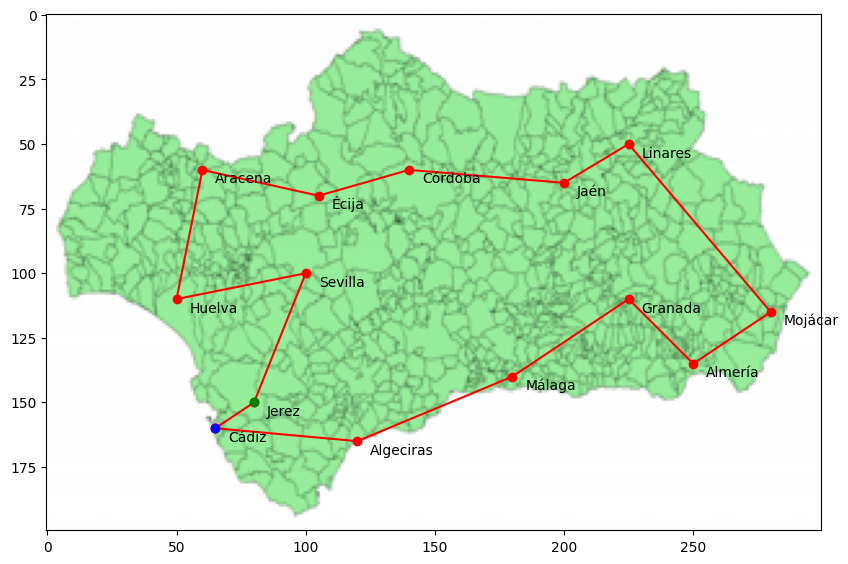

In [12]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Load the image and adjust its size
imagen = Image.open('andalucia.png')
imagen = imagen.resize((300, 200))  # Adjust the size of the image

ax.imshow(imagen)

plt.plot(x + [x[0]], y + [y[0]], 'ro-')
plt.plot(x[0], y[0], 'bo')
plt.plot(x[-1], y[-1], 'go')

for k in range(len(path)):
    plt.text(x[k]+5, y[k]+5, names[path[k]])
    
plt.show()